# Data Labelling Analysis (DLA) Dataset E

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
print('Libraries imported!!')

Libraries imported!!


In [2]:
#define directory of functions and actual directory
HOME_PATH = '' #home path of the project
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/RESEMBLANCE'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)

#import functions for data labelling analisys
from data_labelling import mix_data
from data_labelling import split_data
from data_labelling import DataPreProcessor
from data_labelling import ClassificationModels

#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [3]:
#Define global variables
DATA_TYPES = ['Real','GM','SDV','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/E_PimaIndiansDiabetes_Real_Train.csv',
            'GM' : HOME_PATH + 'SYNTHETIC DATASETS/GM/E_PimaIndiansDiabetes_Synthetic_GM.csv',
            'SDV' : HOME_PATH + 'SYNTHETIC DATASETS/SDV/E_PimaIndiansDiabetes_Synthetic_SDV.csv',
            'CTGAN' : HOME_PATH + 'SYNTHETIC DATASETS/CTGAN/E_PimaIndiansDiabetes_Synthetic_CTGAN.csv',
            'WGANGP' : HOME_PATH + 'SYNTHETIC DATASETS/WGANGP/E_PimaIndiansDiabetes_Synthetic_WGANGP.csv'}
categorical_columns = ['Outcome']
data = dict()

In [4]:
#iterate over all datasets filepaths and read each dataset
for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category')
data

{'Real':      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0              2       84              0              0        0   0.0   
 1              9      112             82             24        0  28.2   
 2              1      139             46             19       83  28.7   
 3              0      161             50              0        0  21.9   
 4              6      134             80             37      370  46.2   
 ..           ...      ...            ...            ...      ...   ...   
 609            5      139             64             35      140  28.6   
 610            1       96            122              0        0  22.4   
 611           10      101             86             37        0  45.6   
 612            0      141              0              0        0  42.4   
 613            0      125             96              0        0  22.5   
 
      DiabetesPedigreeFunction  Age Outcome  
 0                       0.304   21       0 

## 2. Mix real data with synthetic data

In [5]:
mixed_data = dict()
for name in SYNTHESIZERS :
    mixed_data[name] = mix_data(data['Real'], data[name])
mixed_data

{'GM':      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
 609            5      139             64             35      140  28.600000   
 590            1      119             54             13       50  22.300000   
 280            3      120             70             30      135  42.900000   
 449            6      102             90             39        0  35.700000   
 95             0      106             70             37      148  39.400000   
 ..           ...      ...            ...            ...      ...        ...   
 174            1      153             82             42      485  40.600000   
 590            1      108             68              2       80  26.922516   
 129            9      171            110             24      240  45.400000   
 138            6      100             92             30      122  23.872420   
 321            3      161             57             37      134  36.018360   
 
      DiabetesPedigreeFunction  

- 0 for real data
- 1 for synthetic data

## 2. Split train and test data

In [6]:
train_len = 0.8
train_data = dict()
test_data = dict()
for name in SYNTHESIZERS :
    print(name)
    train_data[name], test_data[name] = split_data(mixed_data[name], train_len)
    print(train_data[name].shape, test_data[name].shape)
    print('Train data', train_data[name].groupby('Label').size())
    print('Test data', test_data[name].groupby('Label').size())
    print('##############################################')

GM
(982, 10) (245, 10)
Train data Label
0.0    488
1.0    494
dtype: int64
Test data Label
0.0    126
1.0    119
dtype: int64
##############################################
SDV
(982, 10) (245, 10)
Train data Label
0.0    488
1.0    494
dtype: int64
Test data Label
0.0    126
1.0    119
dtype: int64
##############################################
CTGAN
(982, 10) (245, 10)
Train data Label
0.0    497
1.0    485
dtype: int64
Test data Label
0.0    117
1.0    128
dtype: int64
##############################################
WGANGP
(982, 10) (245, 10)
Train data Label
0.0    483
1.0    499
dtype: int64
Test data Label
0.0    130
1.0    115
dtype: int64
##############################################


## 3. Train Classifiers

In [7]:
categorical_columns = ['Outcome']
numerical_columns = data['Real'].select_dtypes(include=['int64','float64']).columns.tolist()
categories = [np.array([0, 1])]

#initialize classifiers
classifiers_all = dict()
data_preprocessors = dict()

target = 'Label'

for name in SYNTHESIZERS : 
    print(name)
    
    classifiers_all[name] = ClassificationModels()
    
    data_preprocessors[name] = DataPreProcessor(categorical_columns, numerical_columns, categories)
    x_train = data_preprocessors[name].preprocess_train_data(train_data[name].iloc[:, train_data[name].columns != target])
    y_train = train_data[name].loc[:, target]
    
    classifiers_all[name].train_classifiers(x_train, y_train)
    
    print('####################################################')

GM
RF Trained
KNN Trained
DT Trained
SVM Trained
MLP Trained
####################################################
SDV
RF Trained
KNN Trained
DT Trained
SVM Trained
MLP Trained
####################################################
CTGAN
RF Trained
KNN Trained
DT Trained
SVM Trained
MLP Trained
####################################################
WGANGP
RF Trained
KNN Trained
DT Trained
SVM Trained
MLP Trained
####################################################


## 5. Evaluate Classifiers

In [8]:
results_all = dict()

for name in SYNTHESIZERS : 
    print(name)
    
    x_test = data_preprocessors[name].preprocess_test_data(test_data[name].loc[:, test_data[name].columns != target])
    print(x_test.shape)
    y_test = test_data[name].loc[:, target]
    
    classifiers_all[name].evaluate_classifiers(x_test, y_test)
    print('####################################################')

GM
(245, 10)
RF Tested
  model  accuracy  precision  recall      f1
0    RF       0.8      0.807  0.7731  0.7897
KNN Tested
  model  accuracy  precision  recall      f1
0   KNN    0.6408     0.7183  0.4286  0.5368
DT Tested
  model  accuracy  precision  recall      f1
0    DT    0.7633     0.7563  0.7563  0.7563
SVM Tested
  model  accuracy  precision  recall      f1
0   SVM    0.4531     0.4545  0.6303  0.5282
MLP Tested
  model  accuracy  precision  recall      f1
0   MLP    0.7592     0.7459  0.7647  0.7552
####################################################
SDV
(245, 10)
RF Tested
  model  accuracy  precision  recall      f1
0    RF    0.8694     0.9065  0.8151  0.8584
KNN Tested
  model  accuracy  precision  recall      f1
0   KNN    0.6776     0.8125   0.437  0.5683
DT Tested
  model  accuracy  precision  recall      f1
0    DT    0.8367     0.8435  0.8151  0.8291
SVM Tested
  model  accuracy  precision  recall      f1
0   SVM    0.4531     0.4634  0.7983  0.5864
MLP Tested
  mo

## 6. Analyse models results

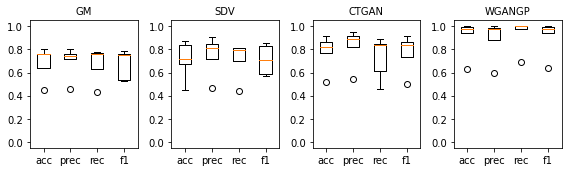

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(8, 2.5))
axs_idxs = [[0,0], [0,1], [1,0], [1,1]]
axs_idxs = [0, 1, 2, 3]
idx = dict(zip(SYNTHESIZERS,axs_idxs))

for name in SYNTHESIZERS :
    ax_plot = axs[idx[name]]
    classifiers_all[name].plot_classification_metrics(ax_plot)
    ax_plot.set_title(name, fontsize=10)

plt.tight_layout()
fig.savefig('DATA LABELLING RESULTS/CLASSIFICATION_METRICS.svg', bbox_inches='tight')